In [1]:
import pickle
from datetime import date
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import sys
sys.path.insert(1, '/home/mauricio/code/mcr')

# NetworkX API Basics

In [2]:
G = nx.Graph()

In [3]:
# add nodes
G.add_nodes_from([1, 2, 3])
G.nodes()

NodeView((1, 2, 3))

In [4]:
# add edges
G.add_edge(1, 2)
G.edges()

EdgeView([(1, 2)])

In [5]:
# add metadata
G.nodes[1]['label'] = 'blue'

In [6]:
G.nodes[1]

{'label': 'blue'}

In [7]:
G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

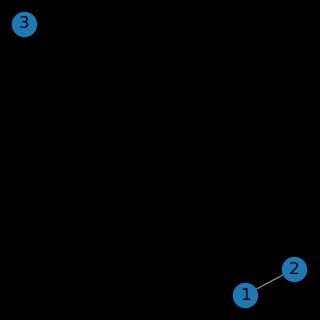

In [8]:
fig = plt.figure(figsize=(3,3))
nx.draw(G, edge_color='gray', with_labels=True)
fig.set_facecolor('black')

# Queries on a graph

In [9]:
with open('ego-twitter.p', 'rb') as f:
    T = pickle.load(f)
len(T)

23369

In [10]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']
print(len(noi))

7833


In [11]:
# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]
print(len(eoi))

12387


# Types of graphs

## Undirected Graphs

In [12]:
type(nx.Graph())

networkx.classes.graph.Graph

## Directed graphs

In [13]:
type(nx.DiGraph())

networkx.classes.digraph.DiGraph

## Multi-edge graphs

In [14]:
type(nx.MultiGraph())

networkx.classes.multigraph.MultiGraph

## Multi-edge (Directed) graphs

In [15]:
type(nx.MultiDiGraph())

networkx.classes.multidigraph.MultiDiGraph

> Sometimes, for pratical reasons, it may be too memory intensive to model multiple edges per pair of nodes, and so one may chosse to collapse edges into single edge that contains a metadata summary of the original.

> For example, we may want to collapse these three edges into a single one and give them a "weight" metadata with the value "3", indicating that it was originally 3 edges between the pair of nodes.

## Weights on graphs
Edges can contain weights

## Self-loops
Nodes that are connected to themselves

> Self-loops can be used in certain scenarios, such as in bike sharing data, where a trip begins at a station and end at the same station. One of the exercises you will encounter will leverage what you've learned so far about the NetworkX API to find edges that are self-loops in a graph. 

## Specifying a weight on edges

Weights can be added to edges in a graph, typically indicating the "strength" of an edge. In NetworkX, the weight is indicated by the 'weight' key in the metadata dictionary.

In [16]:
# Set the weight of the edge
T.edges[1, 10]['weight'] = 2
T.edges[1, 10]

{'date': datetime.date(2012, 9, 8), 'weight': 2}

In [17]:
# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):
    # Check if node 293 is involved
    if 293 in [u, v]:
        print(f'edge: {u,v}')
        # Set the weight to 1.1
        T.edges[u,v]['weight'] = 1.1
        break

edge: (232, 293)


In [18]:
T.edges[232, 293]

{'date': datetime.date(2008, 3, 24), 'weight': 1.1}

## Checking whether there are self-loops in the graph

In [19]:
from mcr.nx import find_selfloop_nodes

In [20]:
len(find_selfloop_nodes(T))

42

# Network visualization

## Visualizing networks
* Matrix plots
* Arc plots
* Circos plots

## nxviz API

In [21]:
import nxviz as nv

/home/mauricio/miniconda3/envs/dev/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


### Example Graph

In [22]:
import numpy as np
G = nx.erdos_renyi_graph(n=71, p=0.1)
for n, d in G.nodes(data=True):
    G.nodes[n]["group"] = np.random.choice(["a", "b", "c"])
    G.nodes[n]["value"] = np.random.exponential()
# np.random.seed(44)
for u, v, d in G.edges(data=True): 
    G.edges[u, v]["edge_value"] = np.random.exponential()
#u, v = np.random.choice(list(G.edges()))

In [23]:
nv.utils.node_table(G)

,group,value
0,a,1.294581
1,a,2.939982
2,a,1.910616
3,a,0.043584
4,b,0.878714
...,...,...
66,b,1.915525
67,b,1.467689
68,c,0.076283
69,c,1.047598


In [24]:
nv.utils.edge_table(G)

,edge_value,source,target
0,0.524662,0,7
1,0.524662,7,0
2,1.812376,0,37
3,1.812376,37,0
4,1.129549,0,61
...,...,...,...
515,0.404060,68,63
516,0.609553,66,68
517,0.609553,68,66
518,1.014781,66,70


### Hive Plot

The Hive plot is appropriate here, because we have one categorical variables with three values by which we can group our nodes.

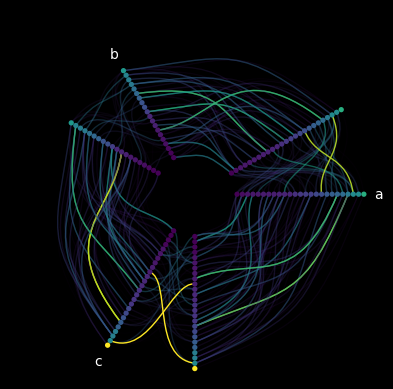

In [25]:
from nxviz import annotate, highlights
ax = nv.hive(G, group_by="group", sort_by="value", node_color_by="value", edge_alpha_by="edge_value", edge_color_by='edge_value')
annotate.hive_group(G, group_by="group", offset=0)

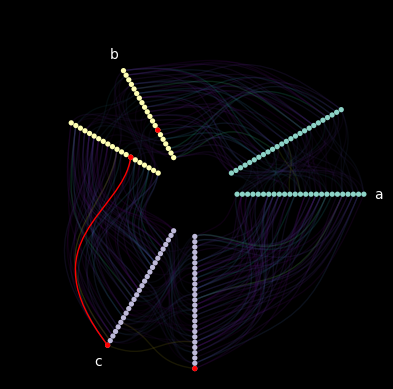

In [26]:
ax = nv.hive(G, group_by="group", node_color_by="group", edge_color_by='edge_value')
annotate.hive_group(G, group_by="group", offset=0)
highlights.hive_node(G, u, group_by="group")
highlights.hive_node(G, v, group_by="group")
highlights.hive_edge(G, u, v, group_by="group") 

### Arc plot

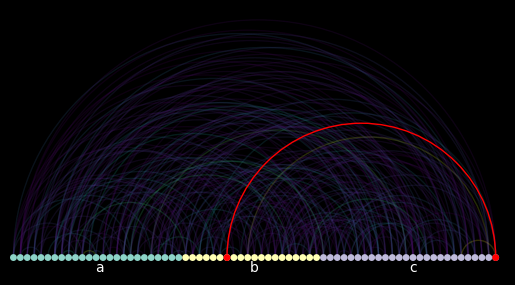

In [27]:
ax = nv.arc( G, group_by="group", node_color_by="group", edge_color_by='edge_value' )
annotate.arc_group(G, group_by="group", ha="center", rotation=0)
highlights.arc_node(G, u, group_by="group")
highlights.arc_node(G, v, group_by="group")
highlights.arc_edge(G, source=u, target=v, group_by="group")

### Visualizing using Matrix plots

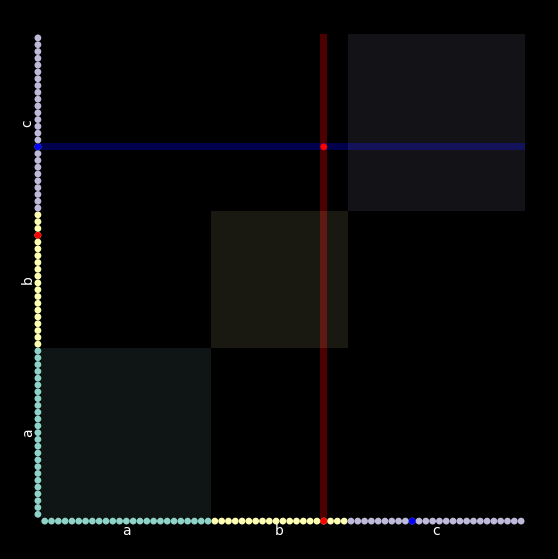

In [28]:
fig, ax = plt.subplots(figsize=(7, 7))
ax = nv.matrix( G, group_by="group", sort_by="value", node_color_by="group", edge_alpha_by="edge_value", )
annotate.matrix_group(G, group_by="group")
annotate.matrix_block(G, group_by="group", color_by="group", alpha=0.1)
highlights.matrix_node(G, u, group_by="group", sort_by="value")
highlights.matrix_node(G, v, group_by="group", sort_by="value", color="blue")
highlights.matrix_row(G, u, group_by="group", sort_by="value")
highlights.matrix_row(G, v, group_by="group", sort_by="value", axis="y", color="blue")
highlights.matrix_edge(G, u, v, group_by="group", sort_by="value")

### Visualizing using Circos plots

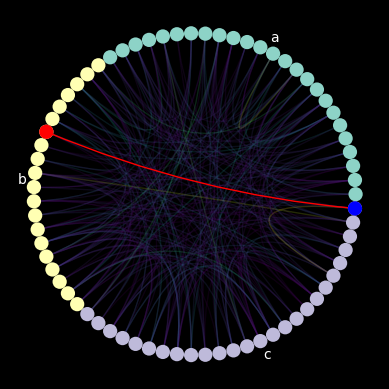

In [29]:
ax = nv.circos( G, group_by="group", node_color_by="group", edge_color_by="edge_value" )
annotate.circos_group(G, group_by="group")
highlights.circos_edge(G, u, v, group_by="group")
highlights.circos_node(G, u, group_by="group")
highlights.circos_node(G, v, group_by="group", color="blue")